# Test de l'opérateur de convection dans Problem

In [1]:
import sys
import os

lib_path = os.path.realpath(os.path.join(os.getcwd(), ".."))
if lib_path not in sys.path:
    sys.path = [lib_path] + sys.path
savefig_path = os.path.join(lib_path, "figures/")
save_fig = False

In [2]:
from flu1ddyn.main_discontinu import *
from flu1ddyn.plot_fields import *

%matplotlib inline
rc("figure", figsize=(10, 5))
rc("figure", dpi=100)
rc("font", size=18)
rc("legend", fontsize=16)
rc("text.latex", preamble=r"\usepackage{siunitx}")

## Test des 3 opérateurs à maillage constant

Ici on va réaliser une simulation sans diffusion pour différentes écritures de notre équation thermique.

La résolution se fait à chaque fois en WENO avec Euler explicite en temps.

In [3]:
n_lim = 10**8
t_fin_lim = 0.002

In [4]:
# d = 6./100*Delta/2.
dx = 3.9 * 10**-5
phy_prop_conv = PhysicalProperties(
    Delta=0.02,
    v=0.2,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=0.0,
    alpha=0.06,
    a_i=357.0,
)
phy_prop_no_conv = PhysicalProperties(
    Delta=0.02,
    v=0.0,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=0.0,
    alpha=0.2,
    a_i=357.0,
)
num_prop_weno = NumericalProperties(
    dx=dx, schema="weno", time_scheme="rk3", phy_prop=phy_prop_conv, cfl=0.5
)
num_prop_quick = NumericalProperties(
    dx=dx, schema="quick", time_scheme="rk3", phy_prop=phy_prop_conv, cfl=0.5
)
num_prop_upwind = NumericalProperties(
    dx=dx, schema="upwind", time_scheme="rk3", phy_prop=phy_prop_conv, cfl=0.5
)
# markers = Bulles(phy_prop=phy_prop_conv, x=num_prop.x, n_bulle=1)
markers = Bulles(phy_prop=phy_prop_conv, n_bulle=1)


TOF
===
dt fourier
6.918433404737903e-06
Db / dx = 30

TOF
===
dt fourier
6.918433404737903e-06
Db / dx = 30

TOF
===
dt fourier
6.918433404737903e-06
Db / dx = 30

TOF
===
dt fourier
6.918433404737903e-06
Db / dx = 30


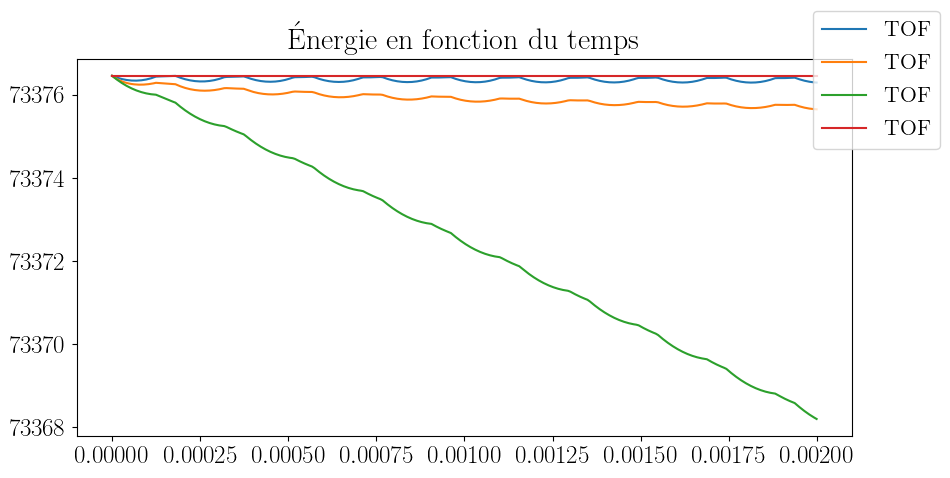

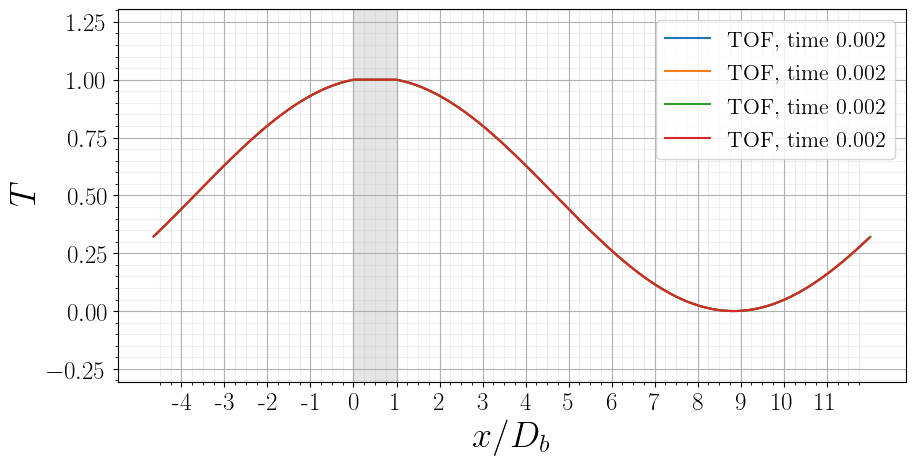

In [5]:
t_fin = 0.2
fig1, ax1 = plt.subplots(1)
ax1.set_title("Énergie en fonction du temps")

plot = Plotter("decale")
prob_conv_weno = Problem(
    get_T, markers=markers, phy_prop=phy_prop_conv, num_prop=num_prop_weno
)
# print(prob_conv_weno.name)
print("==========================")
t, e = prob_conv_weno.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)
l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob_conv_weno.name)

prob_conv_quick = Problem(
    get_T, markers=markers, phy_prop=phy_prop_conv, num_prop=num_prop_quick
)
# print(prob_conv_quick.name)
print("==========================")
t, e = prob_conv_quick.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)
l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob_conv_quick.name)

prob_conv_upwind = Problem(
    get_T, markers=markers, phy_prop=phy_prop_conv, num_prop=num_prop_upwind
)
# print(prob_conv_upwind.name)
print("==========================")
t, e = prob_conv_upwind.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)
l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob_conv_upwind.name)

prob_no_conv = Problem(
    get_T, markers=markers, phy_prop=phy_prop_no_conv, num_prop=num_prop_weno
)
# print(prob_no_conv.name)
print("==========================")
t1, e1 = prob_no_conv.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)
l = ax1.plot(t1, e1 / (0.02 * 0.005 * 0.005), label=prob_no_conv.name)

le = fig1.legend()


Reference
dt fourier
6.918433404737903e-06
Db / dx = 30

\emph{WENO} convection
dt fourier
6.918433404737903e-06
Db / dx = 30

\emph{QUICK} convection
dt fourier
6.918433404737903e-06
Db / dx = 30

\emph{upwind} convection
dt fourier
6.918433404737903e-06
Db / dx = 30


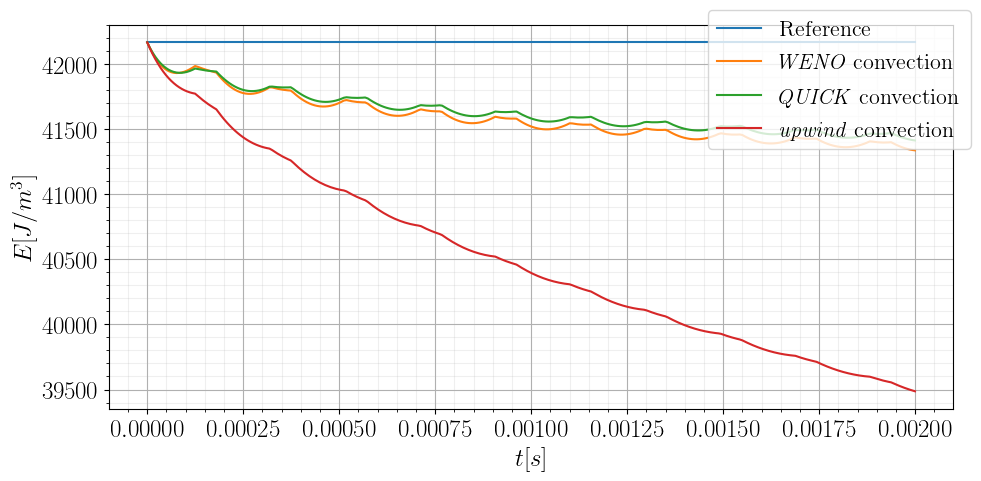

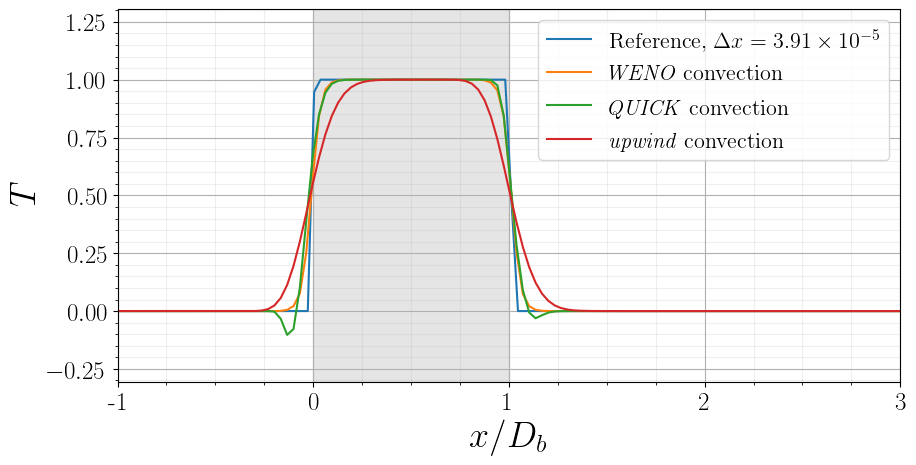

In [6]:
t_fin = 0.4
fig1, ax1 = plt.subplots(1)
# ax1.set_title('Énergie en fonction du temps')
plot = Plotter("decale", time=False, zoom=(-1, 3))

prob_no_conv = Problem(
    get_T_creneau,
    markers=markers,
    phy_prop=phy_prop_no_conv,
    num_prop=num_prop_weno,
    name="Reference",
)
# print(prob_no_conv.name)
print("==========================")
t1, e1 = prob_no_conv.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)
l = ax1.plot(t1, e1 / (0.02 * 0.005 * 0.005), label=prob_no_conv.name)

prob_conv_weno = Problem(
    get_T_creneau,
    markers=markers,
    phy_prop=phy_prop_conv,
    num_prop=num_prop_weno,
    name=r"\emph{WENO} convection",
)
# print(prob_conv_weno.name)
print("==========================")
t, e = prob_conv_weno.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)
l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob_conv_weno.name)

prob_conv_quick = Problem(
    get_T_creneau,
    markers=markers,
    phy_prop=phy_prop_conv,
    num_prop=num_prop_quick,
    name="\emph{QUICK} convection",
)
# print(prob_conv_quick.name)
print("==========================")
t, e = prob_conv_quick.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)
l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob_conv_quick.name)

prob_conv_upwind = Problem(
    get_T_creneau,
    markers=markers,
    phy_prop=phy_prop_conv,
    num_prop=num_prop_upwind,
    name=r"\emph{upwind} convection",
)
# print(prob_conv_upwind.name)
print("==========================")
t, e = prob_conv_upwind.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)
l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob_conv_upwind.name)

le = fig1.legend()
ax1.minorticks_on()
ax1.grid(b=True, which="major")
ax1.grid(b=True, which="minor", alpha=0.2)
ax1.set_xlabel(r"$t [s]$")
ax1.set_ylabel(r"$E [J/m^3]$")
fig1.tight_layout()
handles, labels = plot.ax.get_legend_handles_labels()
labels[0] = labels[0].split(",")[0] + r", $\Delta x = \num{%.2e}$" % num_prop_weno.dx
# add_legend = ['', '', '', r', $\Delta x = \num{%.2e}$' % num_prop_weno.dx]
# labels = [lab.split(',')[0] + add_legend[i] for i,lab in enumerate(labels)]
plot.ax.legend(handles, labels)
if save_fig:
    plot.fig.savefig(savefig_path + "temperature_comparaison_convection.pdf")
    fig1.savefig(savefig_path + "energy_loss_comparaison_convection.pdf")

# Avec convection et diffusion

In [7]:
# d = 6./100*Delta/2.
dx = 3.9 * 10**-5
phy_prop_conv = PhysicalProperties(
    Delta=0.02,
    v=0.2,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=1.0,
    alpha=0.06,
    a_i=357.0,
)
phy_prop_no_conv = PhysicalProperties(
    Delta=0.02,
    v=0.0,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=1.0,
    alpha=0.2,
    a_i=357.0,
)
num_prop_weno = NumericalProperties(
    dx=dx, schema="weno", time_scheme="rk3", phy_prop=phy_prop_conv, cfl=0.5
)
num_prop_quick = NumericalProperties(
    dx=dx, schema="quick", time_scheme="rk3", phy_prop=phy_prop_conv, cfl=0.5
)
num_prop_upwind = NumericalProperties(
    dx=dx, schema="upwind", time_scheme="rk3", phy_prop=phy_prop_conv, cfl=0.5
)
# markers = Bulles(phy_prop=phy_prop_conv, x=num_prop.x, n_bulle=1)
markers = Bulles(phy_prop=phy_prop_conv, n_bulle=1)
markers.shift(0.00901)


Reference
dt fourier
6.918433404737903e-06
Db / dx = 30

\emph{WENO} convection
dt fourier
6.918433404737903e-06
Db / dx = 30

\emph{QUICK} convection
dt fourier
6.918433404737903e-06
Db / dx = 30

\emph{upwind} convection
dt fourier
6.918433404737903e-06
Db / dx = 30


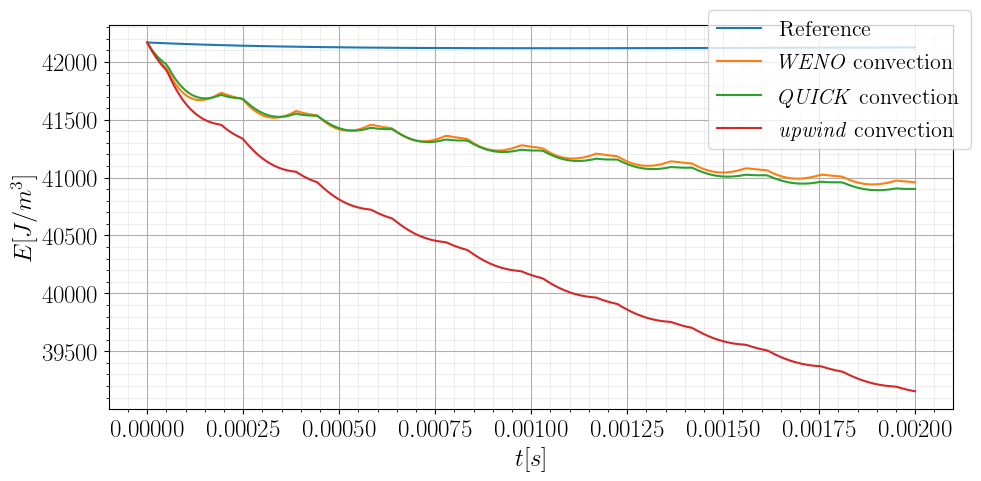

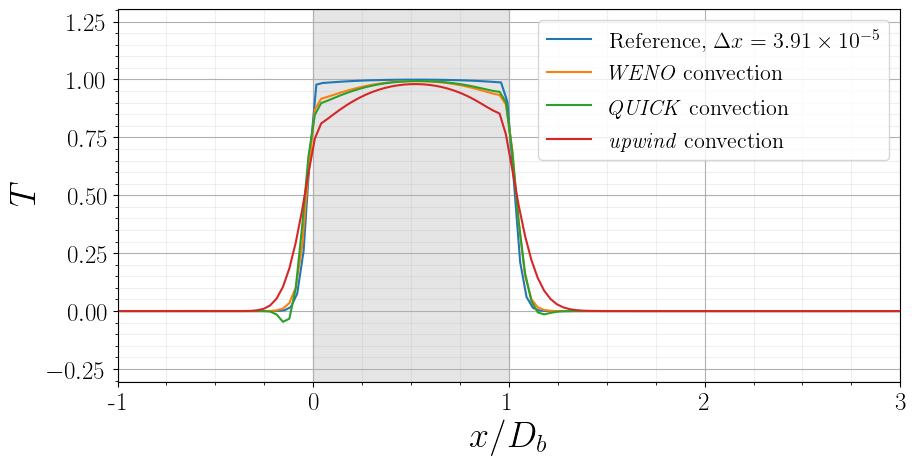

In [8]:
t_fin = 0.4
fig1, ax1 = plt.subplots(1)
# ax1.set_title('Énergie en fonction du temps')
plot = Plotter("decale", time=False, zoom=(-1, 3))

prob_no_conv = Problem(
    get_T_creneau,
    markers=markers,
    phy_prop=phy_prop_no_conv,
    num_prop=num_prop_weno,
    name="Reference",
)
# print(prob_no_conv.name)
print("==========================")
t1, e1 = prob_no_conv.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)
l = ax1.plot(t1, e1 / (0.02 * 0.005 * 0.005), label=prob_no_conv.name)

prob_conv_weno = Problem(
    get_T_creneau,
    markers=markers,
    phy_prop=phy_prop_conv,
    num_prop=num_prop_weno,
    name=r"\emph{WENO} convection",
)
# print(prob_conv_weno.name)
print("==========================")
t, e = prob_conv_weno.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)
l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob_conv_weno.name)

prob_conv_quick = Problem(
    get_T_creneau,
    markers=markers,
    phy_prop=phy_prop_conv,
    num_prop=num_prop_quick,
    name="\emph{QUICK} convection",
)
# print(prob_conv_quick.name)
print("==========================")
t, e = prob_conv_quick.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)
l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob_conv_quick.name)

prob_conv_upwind = Problem(
    get_T_creneau,
    markers=markers,
    phy_prop=phy_prop_conv,
    num_prop=num_prop_upwind,
    name=r"\emph{upwind} convection",
)
# print(prob_conv_upwind.name)
print("==========================")
t, e = prob_conv_upwind.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)
l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob_conv_upwind.name)

le = fig1.legend()
ax1.minorticks_on()
ax1.grid(b=True, which="major")
ax1.grid(b=True, which="minor", alpha=0.2)
ax1.set_xlabel(r"$t [s]$")
ax1.set_ylabel(r"$E [J/m^3]$")
fig1.tight_layout()
handles, labels = plot.ax.get_legend_handles_labels()
labels[0] = labels[0].split(",")[0] + r", $\Delta x = \num{%.2e}$" % num_prop_weno.dx
# add_legend = ['', '', '', r', $\Delta x = \num{%.2e}$' % num_prop_weno.dx]
# labels = [lab.split(',')[0] + add_legend[i] for i,lab in enumerate(labels)]
plot.ax.legend(handles, labels)
if save_fig:
    plot.fig.savefig(savefig_path + "temperature_comparaison_convection_diff.pdf")
    fig1.savefig(savefig_path + "energy_loss_comparaison_convection_diff.pdf")

**Remarque** :

**Le Quick est oscillant donc prend des valeurs négatives, et est instable avec la diffusion centrée 2**

## Test des 3 opérateurs en convergence de maillage

Ici on va réaliser une simulation sans diffusion pour différentes écritures de notre équation thermique.

In [9]:
# d = 6./100*Delta/2.
dx_l = [2.0 * 10**-4, 1.0 * 10**-4, 5.0 * 10**-5, 2.5 * 10**-5]
phy_prop_conv = PhysicalProperties(
    Delta=0.02,
    v=0.2,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=0.0,
    alpha=0.06,
    a_i=357.0,
)
phy_prop_no_conv = PhysicalProperties(
    Delta=0.01,
    v=0.0,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=0.0,
    alpha=0.25,
    a_i=357.0,
)
num_prop_weno_l = [
    NumericalProperties(
        dx=dx, schema="weno", time_scheme="rk3", phy_prop=phy_prop_conv, cfl=0.5
    )
    for dx in dx_l
]
num_prop_quick_l = [
    NumericalProperties(
        dx=dx, schema="quick", time_scheme="rk3", phy_prop=phy_prop_conv, cfl=0.5
    )
    for dx in dx_l
]
num_prop_upwind_l = [
    NumericalProperties(
        dx=dx, schema="upwind", time_scheme="rk3", phy_prop=phy_prop_conv, cfl=0.5
    )
    for dx in dx_l
]
# markers = Bulles(phy_prop=phy_prop_conv, x=num_prop.x, n_bulle=1)
markers = Bulles(phy_prop=phy_prop_conv, n_bulle=1)
markers.shift(0.00001)


Ref
===
dt fourier
6.918433404737903e-06
Db / dx = 30

\emph{WENO}
dt fourier
0.00018136258064516128
Db / dx = 05

\emph{WENO}
dt fourier
4.534064516129032e-05
Db / dx = 11

\emph{WENO}
dt fourier
1.133516129032258e-05
Db / dx = 23

\emph{WENO}
dt fourier
2.833790322580645e-06
Db / dx = 47

\emph{QUICK}
dt fourier
0.00018136258064516128
Db / dx = 05

\emph{QUICK}
dt fourier
4.534064516129032e-05
Db / dx = 11

\emph{QUICK}
dt fourier
1.133516129032258e-05
Db / dx = 23

\emph{QUICK}
dt fourier
2.833790322580645e-06
Db / dx = 47

\emph{upwind}
dt fourier
0.00018136258064516128
Db / dx = 05

\emph{upwind}
dt fourier
4.534064516129032e-05
Db / dx = 11

\emph{upwind}
dt fourier
1.133516129032258e-05
Db / dx = 23

\emph{upwind}
dt fourier
2.833790322580645e-06
Db / dx = 47


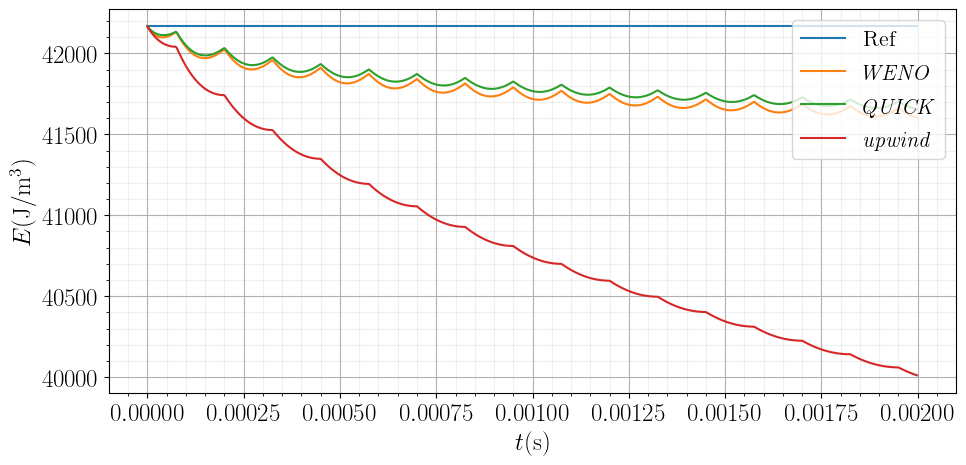

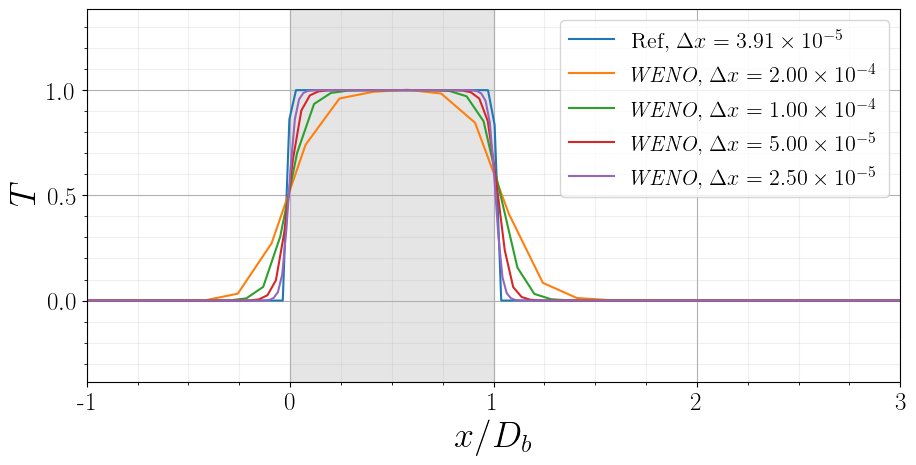

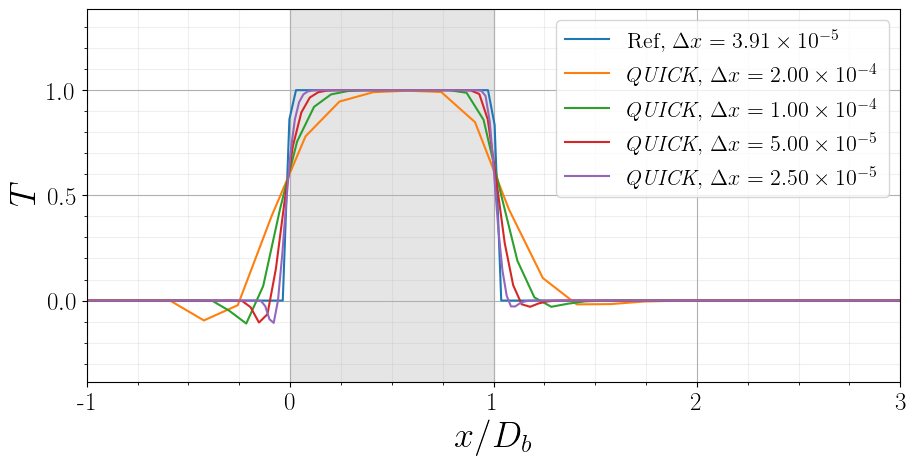

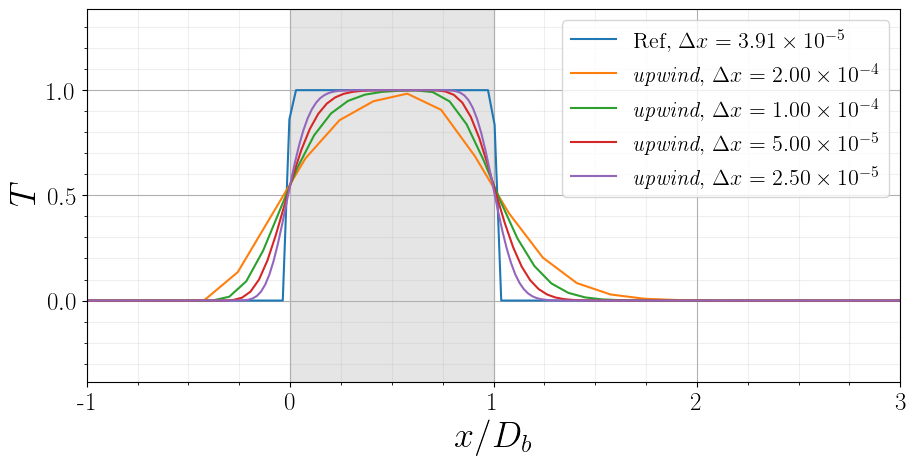

In [10]:
t_fin = 0.05
fig1, ax1 = plt.subplots(1)
# ax1.set_title('Énergie en fonction du temps')
ax1.minorticks_on()
ax1.grid(b=True, which="major")
ax1.grid(b=True, which="minor", alpha=0.2)
ax1.set_xlabel(r"$t$(s)")
ax1.set_ylabel(r"$E$(J/m$^3$)")
fig1.tight_layout()

plot_upwind = Plotter("decale", dx=True, time=False, zoom=(-1, 3))
plot_quick = Plotter("decale", dx=True, time=False, zoom=(-1, 3))
plot_weno = Plotter("decale", dx=True, time=False, zoom=(-1, 3))
list_of_plots = [plot_weno, plot_quick, plot_upwind]
prob_no_conv = Problem(
    get_T_creneau,
    markers=markers,
    phy_prop=phy_prop_no_conv,
    num_prop=num_prop_weno,
    name="Ref",
)
# print(prob_no_conv.name)
print("==========================")
t1, e1 = prob_no_conv.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=list_of_plots
)
l = ax1.plot(t1, e1 / (0.02 * 0.005 * 0.005), label=prob_no_conv.name)

for num_prop_weno in num_prop_weno_l:
    prob_conv_weno = Problem(
        get_T_creneau,
        markers=markers,
        phy_prop=phy_prop_conv,
        num_prop=num_prop_weno,
        name=r"\emph{WENO}",
    )
    # print(prob_conv_weno.name)
    print("==========================")
    t, e = prob_conv_weno.timestep(
        t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot_weno
    )
l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob_conv_weno.name)

for num_prop_quick in num_prop_quick_l:
    prob_conv_quick = Problem(
        get_T_creneau,
        markers=markers,
        phy_prop=phy_prop_conv,
        num_prop=num_prop_quick,
        name=r"\emph{QUICK}",
    )
    # print(prob_conv_quick.name)
    print("==========================")
    t, e = prob_conv_quick.timestep(
        t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot_quick
    )
l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob_conv_quick.name)

for num_prop_upwind in num_prop_upwind_l:
    prob_conv_upwind = Problem(
        get_T_creneau,
        markers=markers,
        phy_prop=phy_prop_conv,
        num_prop=num_prop_upwind,
        name=r"\emph{upwind}",
    )
    # print(prob_conv_upwind.name)
    print("==========================")
    t, e = prob_conv_upwind.timestep(
        t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot_upwind
    )
l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob_conv_upwind.name)

le = ax1.legend()
fig1.tight_layout()

# handles, labels = plot_weno.ax.get_legend_handles_labels()
# labels[:-1] = [lab.split(',')[0] + r' weno, $\Delta x = %g$' % num_prop_weno_l[i].dx for i, lab in enumerate(labels[:-1])]
# le = plot_weno.ax.legend(handles, labels)

# handles, labels = plot_quick.ax.get_legend_handles_labels()
# labels[:-1] = [lab.split(',')[0] + r' quick, $\Delta x = %g$' % num_prop_quick_l[i].dx for i, lab in enumerate(labels[:-1])]
# le = plot_quick.ax.legend(handles, labels)

# handles, labels = plot_upwind.ax.get_legend_handles_labels()
# labels[:-1] = [lab.split(',')[0] + r' upwind, $\Delta x = %g$' % num_prop_upwind_l[i].dx for i, lab in enumerate(labels[:-1])]
# le = plot_upwind.ax.legend(handles, labels)

if save_fig:
    plot_weno.fig.savefig(savefig_path + "temperature_convection_weno_convergence.pdf")
    plot_quick.fig.savefig(
        savefig_path + "temperature_convection_quick_convergence.pdf"
    )
    plot_upwind.fig.savefig(
        savefig_path + "temperature_convection_upwind_convergence.pdf"
    )

## Avec la diffusion

In [11]:
# d = 6./100*Delta/2.
dx = 2 * 10**-4
phy_prop_conv = PhysicalProperties(
    Delta=0.02,
    v=0.2,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=1.0,
    alpha=0.06,
    a_i=357.0,
)
phy_prop_no_conv = PhysicalProperties(
    Delta=0.02,
    v=0.0,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=1.0,
    alpha=0.06,
    a_i=357.0,
)
num_prop_weno = NumericalProperties(
    dx=dx, schema="weno", time_scheme="rk3", phy_prop=phy_prop_conv, cfl=0.5
)
num_prop_quick = NumericalProperties(
    dx=dx, schema="quick", time_scheme="rk3", phy_prop=phy_prop_conv, cfl=0.5
)
num_prop_upwind = NumericalProperties(
    dx=dx, schema="upwind", time_scheme="rk3", phy_prop=phy_prop_conv, cfl=0.5
)
# markers = Bulles(phy_prop=phy_prop_conv, x=num_prop.x, n_bulle=1)
markers = Bulles(phy_prop=phy_prop_conv, n_bulle=1)
markers.shift(0.00801)


TOF
===
dt fourier
0.00018136258064516128
Db / dx = 05

TOF
===
dt fourier
0.00018136258064516128
Db / dx = 05

TOF
===
dt fourier
0.00018136258064516128
Db / dx = 05

TOF
===
dt fourier
0.00018136258064516128
Db / dx = 05


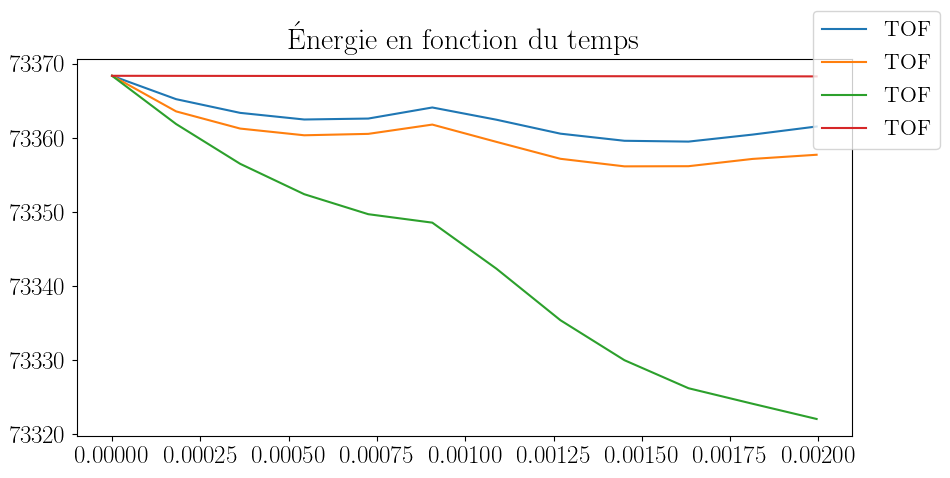

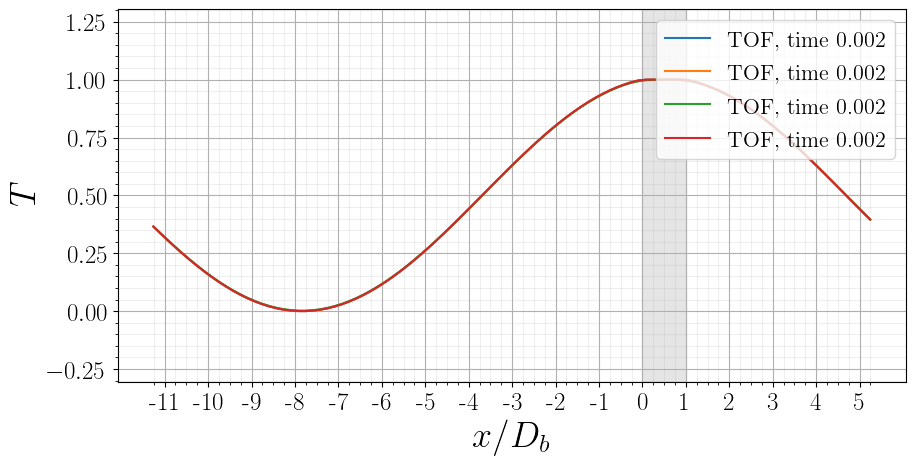

In [12]:
t_fin = 0.2
fig1, ax1 = plt.subplots(1)
ax1.set_title("Énergie en fonction du temps")

plot = Plotter("decale")
prob_conv_weno = Problem(
    get_T, markers=markers, phy_prop=phy_prop_conv, num_prop=num_prop_weno
)
# print(prob_conv_weno.name)
print("==========================")
t, e = prob_conv_weno.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)
l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob_conv_weno.name)

prob_conv_quick = Problem(
    get_T, markers=markers, phy_prop=phy_prop_conv, num_prop=num_prop_quick
)
# print(prob_conv_quick.name)
print("==========================")
t, e = prob_conv_quick.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)
l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob_conv_quick.name)

prob_conv_upwind = Problem(
    get_T, markers=markers, phy_prop=phy_prop_conv, num_prop=num_prop_upwind
)
# print(prob_conv_upwind.name)
print("==========================")
t, e = prob_conv_upwind.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)
l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob_conv_upwind.name)

prob_no_conv = Problem(
    get_T, markers=markers, phy_prop=phy_prop_no_conv, num_prop=num_prop_weno
)
# print(prob_no_conv.name)
print("==========================")
t1, e1 = prob_no_conv.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)
l = ax1.plot(t1, e1 / (0.02 * 0.005 * 0.005), label=prob_no_conv.name)

le = fig1.legend()


TOF
===
dt fourier
0.00018136258064516128
Db / dx = 05

TOF
===
dt fourier
0.00018136258064516128
Db / dx = 05

TOF
===
dt fourier
0.00018136258064516128
Db / dx = 05

TOF
===
dt fourier
0.00018136258064516128
Db / dx = 05


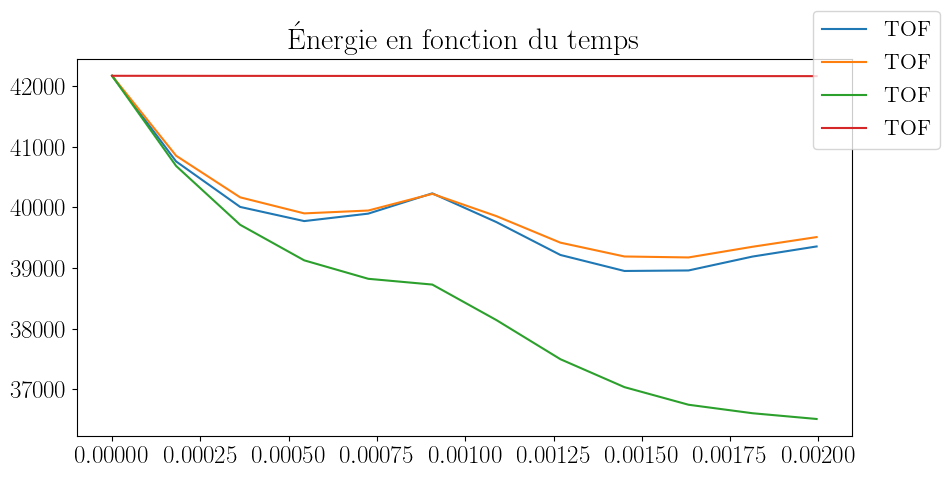

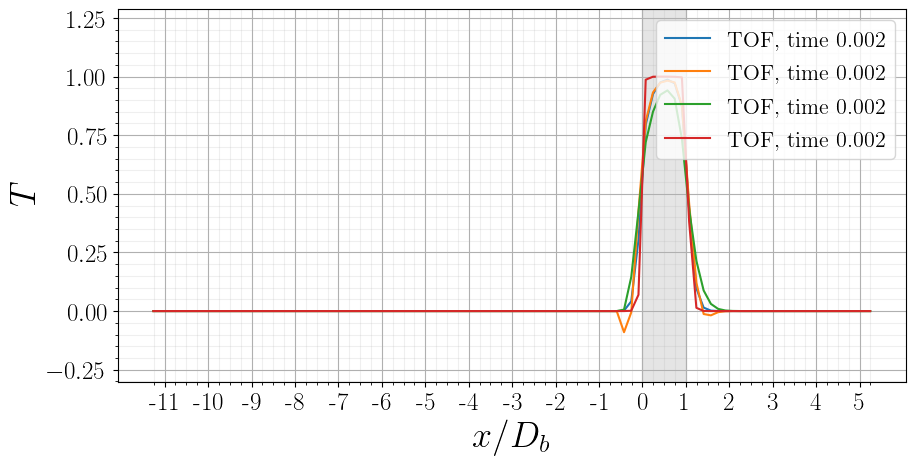

In [13]:
t_fin = 0.2
fig1, ax1 = plt.subplots(1)
ax1.set_title("Énergie en fonction du temps")

plot = Plotter("decale")
prob_conv_weno = Problem(
    get_T_creneau, markers=markers, phy_prop=phy_prop_conv, num_prop=num_prop_weno
)
# print(prob_conv_weno.name)
print("==========================")
t, e = prob_conv_weno.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)
l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob_conv_weno.name)

prob_conv_quick = Problem(
    get_T_creneau, markers=markers, phy_prop=phy_prop_conv, num_prop=num_prop_quick
)
# print(prob_conv_quick.name)
print("==========================")
t, e = prob_conv_quick.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)
l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob_conv_quick.name)

prob_conv_upwind = Problem(
    get_T_creneau, markers=markers, phy_prop=phy_prop_conv, num_prop=num_prop_upwind
)
# print(prob_conv_upwind.name)
print("==========================")
t, e = prob_conv_upwind.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)
l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob_conv_upwind.name)

prob_no_conv = Problem(
    get_T_creneau, markers=markers, phy_prop=phy_prop_no_conv, num_prop=num_prop_weno
)
# print(prob_no_conv.name)
print("==========================")
t1, e1 = prob_no_conv.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)
l = ax1.plot(t1, e1 / (0.02 * 0.005 * 0.005), label=prob_no_conv.name)

le = fig1.legend()

**Remarque** :

**Le Quick est stable avec la diffusion centrée 2 harmonique à l'interface mais instable avec la diffusion centrée 2**